In [25]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from matplotlib import style
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
# import yfinance as yf
# yf.pdr_override()

style.use('ggplot')

In [26]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()
# aapl = web.DataReader('AAPL', 'stooq')
# aapl = pdr.get_data_yahoo("AAPL", start="2005-01-01", end="2023-07-09")
# aapl.head()
# aapl.to_csv('aapl.csv')
aapl = pd.read_csv('aapl.csv', parse_dates=True, index_col=0)
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.960587,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.970453,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.978952,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.979711,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.051045,2227450400


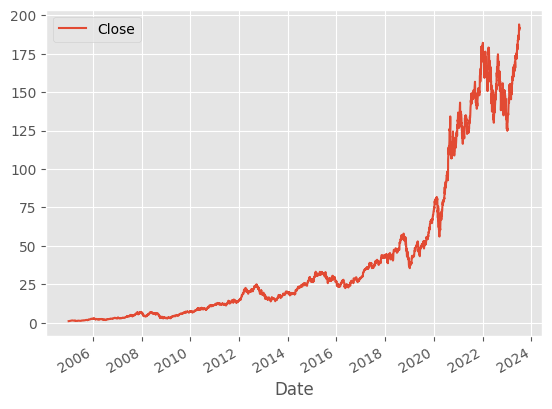

In [27]:
aapl.plot(y='Close')
plt.show()

In [28]:
# making a 100-day moving average, 50-day > 250-day = buy, 50-day < 250-day = sell
aapl['100ma'] = aapl['Close'].rolling(window=100, min_periods=0).mean()
aapl['250ma'] = aapl['Close'].rolling(window=250, min_periods=0).mean()
aapl['50ma'] = aapl['Close'].rolling(window=50, min_periods=0).mean()
aapl.head()

,Open,High,Low,Close,Adj Close,Volume,100ma,250ma,50ma
Date,,,,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.960587,691992000,1.130179,1.130179,1.130179
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.970453,1096810400,1.135983,1.135983,1.135983
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.978952,680433600,1.141250,1.141250,1.141250
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.979711,705555200,1.144107,1.144107,1.144107
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.051045,2227450400,1.162607,1.162607,1.162607


<BarContainer object of 4659 artists>

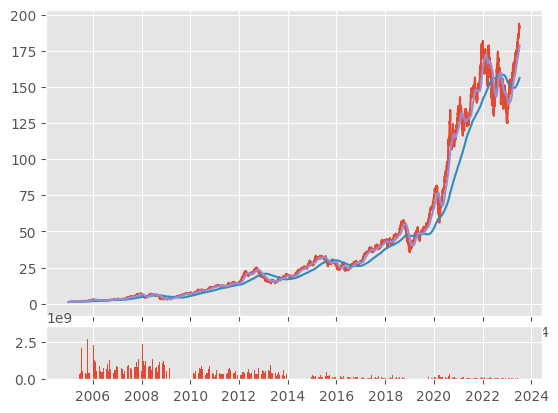

In [29]:
# plotting in matplotlib

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(aapl.index, aapl['Close'])
# ax1.plot(aapl.index, aapl['100ma'])
ax1.plot(aapl.index, aapl['250ma'])
ax1.plot(aapl.index, aapl['50ma'])
ax2.bar(aapl.index, aapl['Volume'])

In [31]:
# ohlc = open high low close
# volume
# resample data to 10-day chunks

aapl_ohlc = aapl['Close'].resample('10D').ohlc()
aapl_volume = aapl['Volume'].resample('10D').sum()

aapl_ohlc.reset_index(inplace=True)

aapl_ohlc['Date'] = aapl_ohlc['Date'].map(mdates.date2num)

aapl.tail()


,Open,High,Low,Close,Adj Close,Volume,100ma,250ma,50ma
Date,,,,,,,,,
2023-06-30,191.630005,194.479996,191.259995,193.970001,193.970001,85069600,166.3363,155.44396,176.6054
2023-07-03,193.779999,193.880005,191.759995,192.460007,192.460007,31458200,166.7144,155.64756,177.1216
2023-07-05,191.570007,192.979996,190.619995,191.330002,191.330002,46920300,167.1085,155.84120,177.6478
2023-07-06,189.839996,192.020004,189.199997,191.809998,191.809998,45094300,167.5179,156.02304,178.1774
2023-07-07,191.410004,192.669998,190.240005,190.679993,190.679993,46778000,167.9146,156.19760,178.7156


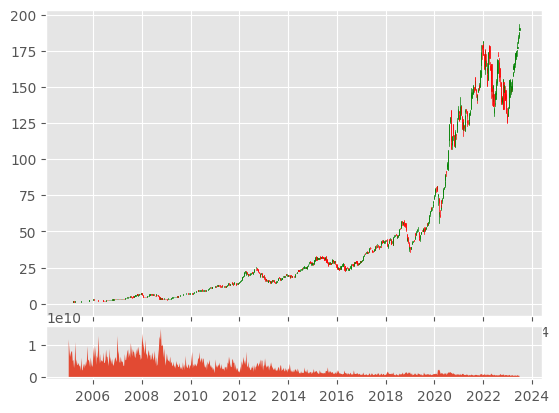

In [98]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.xaxis_date()
candlestick_ohlc(ax1, aapl_ohlc.values, width=2, colorup='g')
ax2.fill_between(aapl_volume.index.map(mdates.date2num), aapl_volume.values, 0)
plt.show()

In [23]:
# get s&p500 ticker list from wikipedia
from bs4 import BeautifulSoup as bs
import requests

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

response = requests.get(url)

soup = bs(response.content, "html.parser")

ticker_elements = soup.find_all("a", class_="external text")
ticker_elements = ticker_elements[:503]

tickers = []

for ticker in ticker_elements:
    tickers.append(ticker.text)

print(tickers)

# table = soup.find("table", {"class": "wikitable sortable"})

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'C